In [1]:
import os
import sys
import pandas as pd
import logging
import pprint
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Config
books_data_path='./data/input_data/Books.txt'
user_ratings_data_path='./data/input_data/User_ratings_books.txt'

In [3]:
# importing the files
books_df=pd.read_csv(books_data_path,usecols=[0,1],header=None , names = ['author_name','book_name'])
user_ratings=pd.read_csv(user_ratings_data_path, header=None,names=['users_ratings'], delimiter='\n')

# Data Preprocessing

In [4]:
print(books_df.shape)
books_df.head(10)

(55, 2)


,author_name,book_name
0,Douglas Adams,The Hitchhiker's Guide To The Galaxy
1,Richard Adams,Watership Down
2,Mitch Albom,The Five People You Meet in Heaven
3,Laurie Halse Anderson,Speak
4,Maya Angelou,I Know Why the Caged Bird Sings
5,Jay Asher,Thirteen Reasons Why
6,Isaac Asimov,Foundation Series
7,Ann Brashares,The Sisterhood of the Travelling Pants
8,Libba Bray,A Great and Terrible Beauty
9,Dan Brown,The Da Vinci Code


In [5]:
user_ratings

,users_ratings
0,Ben
1,5 0 0 0 0 0 0 1 0 1 -3 5 0 0 0 5 5 0 0 0 0 5 0...
2,Moose
3,5 5 0 0 0 0 3 0 0 1 0 5 3 0 5 0 3 3 5 0 0 0 0 ...
4,Reuven
...,...
167,3 1 0 0 0 0 3 -3 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0...
168,KeeLed
169,0 0 0 5 0 0 0 5 0 5 5 0 0 0 0 0 5 -3 -3 0 0 0 ...
170,Megan


In [6]:
# Extracting Users
users_df=user_ratings[0::2].assign()
users_df=users_df.reset_index(drop=True)
users_df.rename({'users_ratings':'users'},inplace=True,axis=1)

# Extracting ratings
ratings_df=user_ratings[1::2].assign()
ratings_df=ratings_df.reset_index(drop=True)
ratings_df.rename({'users_ratings':'ratings'},inplace=True,axis=1)

In [7]:
users_df

,users
0,Ben
1,Moose
2,Reuven
3,Cust1
4,Cust2
...,...
81,dencellia
82,Nathan
83,James
84,KeeLed


In [8]:
ratings_df

,ratings
0,5 0 0 0 0 0 0 1 0 1 -3 5 0 0 0 5 5 0 0 0 0 5 0...
1,5 5 0 0 0 0 3 0 0 1 0 5 3 0 5 0 3 3 5 0 0 0 0 ...
2,5 -5 0 0 0 0 -3 -5 0 1 -5 5 0 1 0 1 -3 1 -5 0 ...
3,3 3 5 0 0 0 3 0 0 3 0 3 0 0 0 0 0 3 0 5 0 0 0 ...
4,3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 ...
...,...
81,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -3 0 0 0 0...
82,0 0 0 0 0 0 0 -5 0 5 1 0 0 0 1 0 5 0 -3 0 3 0 ...
83,3 1 0 0 0 0 3 -3 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0...
84,0 0 0 5 0 0 0 5 0 5 5 0 0 0 0 0 5 -3 -3 0 0 0 ...


In [9]:
# Combininng Users and ratings dataframe
users_ratings_df=pd.concat([users_df,ratings_df],axis=1)
users_ratings_df

,users,ratings
0,Ben,5 0 0 0 0 0 0 1 0 1 -3 5 0 0 0 5 5 0 0 0 0 5 0...
1,Moose,5 5 0 0 0 0 3 0 0 1 0 5 3 0 5 0 3 3 5 0 0 0 0 ...
2,Reuven,5 -5 0 0 0 0 -3 -5 0 1 -5 5 0 1 0 1 -3 1 -5 0 ...
3,Cust1,3 3 5 0 0 0 3 0 0 3 0 3 0 0 0 0 0 3 0 5 0 0 0 ...
4,Cust2,3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 ...
...,...,...
81,dencellia,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -3 0 0 0 0...
82,Nathan,0 0 0 0 0 0 0 -5 0 5 1 0 0 0 1 0 5 0 -3 0 3 0 ...
83,James,3 1 0 0 0 0 3 -3 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0...
84,KeeLed,0 0 0 5 0 0 0 5 0 5 5 0 0 0 0 0 5 -3 -3 0 0 0 ...


In [10]:
## Total number of books
books_df.shape[0]

55

In [11]:
users_ratings_df['ratings']=users_ratings_df['ratings'].apply(lambda x: x.strip())

In [12]:
users_ratings_df['ratings']=users_ratings_df['ratings'].apply(lambda x: x.split(' '))

In [13]:
# Checking in list if for users 55 ratings are present or not
# So that will be there ratings for all books

In [14]:
users_ratings_df['no_of_ratings']=users_ratings_df['ratings'].apply(lambda x: len(x))

In [15]:
users_ratings_df[users_ratings_df['no_of_ratings']!=55]

,users,ratings,no_of_ratings


In [16]:
## So For above Users all books ratings are not present
## Which needs to be handled

In [17]:
users_ratings_df.columns

Index(['users', 'ratings', 'no_of_ratings'], dtype='object')

In [18]:
users_ratings_df=users_ratings_df[['users', 'ratings']]

## Combining books_df and user_ratings_df

In [19]:
all_books_list=list(books_df['book_name'].values)

In [20]:
def combine_df_func(ele):
    return ele[pos]

In [21]:
for book,pos in zip(all_books_list,range(len(all_books_list))):
    users_ratings_df[book]=users_ratings_df['ratings'].apply(combine_df_func)

In [22]:
users_ratings_df.head(2)

,users,ratings,The Hitchhiker's Guide To The Galaxy,Watership Down,The Five People You Meet in Heaven,Speak,I Know Why the Caged Bird Sings,Thirteen Reasons Why,Foundation Series,The Sisterhood of the Travelling Pants,...,The Shadow Club,Bone Series,Maus: A Survivor's Tale,The Joy Luck Club,The Lord of the Rings,The Hobbit,Shattered,The War Of The Worlds,Dealing with Dragons,The Chrysalids
0,Ben,"[5, 0, 0, 0, 0, 0, 0, 1, 0, 1, -3, 5, 0, 0, 0,...",5,0,0,0,0,0,0,1,...,5,5,0,0,0,5,5,5,5,-5
1,Moose,"[5, 5, 0, 0, 0, 0, 3, 0, 0, 1, 0, 5, 3, 0, 5, ...",5,5,0,0,0,0,3,0,...,0,0,0,0,5,5,0,3,0,0


### Checking duplicates

In [23]:
print("Check Duplicates : ", users_ratings_df.shape[0], users_ratings_df.drop_duplicates(subset=['users']).shape[0])

Check Duplicates :  86 85


In [24]:
users_ratings_df.users.value_counts()

Don Wang         2
Cust4            1
Ben              1
Mike             1
Jim C            1
                ..
sage32           1
ParseClaws       1
Harry Potter     1
Iren             1
Mike Williams    1
Name: users, Length: 85, dtype: int64

In [25]:
users_ratings_df[users_ratings_df['users']=='Don Wang']

,users,ratings,The Hitchhiker's Guide To The Galaxy,Watership Down,The Five People You Meet in Heaven,Speak,I Know Why the Caged Bird Sings,Thirteen Reasons Why,Foundation Series,The Sisterhood of the Travelling Pants,...,The Shadow Club,Bone Series,Maus: A Survivor's Tale,The Joy Luck Club,The Lord of the Rings,The Hobbit,Shattered,The War Of The Worlds,Dealing with Dragons,The Chrysalids
46,Don Wang,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
53,Don Wang,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0


In [26]:
users_ratings_df = users_ratings_df.drop_duplicates(subset=['users'])

In [27]:
users_ratings_df.head(2)

,users,ratings,The Hitchhiker's Guide To The Galaxy,Watership Down,The Five People You Meet in Heaven,Speak,I Know Why the Caged Bird Sings,Thirteen Reasons Why,Foundation Series,The Sisterhood of the Travelling Pants,...,The Shadow Club,Bone Series,Maus: A Survivor's Tale,The Joy Luck Club,The Lord of the Rings,The Hobbit,Shattered,The War Of The Worlds,Dealing with Dragons,The Chrysalids
0,Ben,"[5, 0, 0, 0, 0, 0, 0, 1, 0, 1, -3, 5, 0, 0, 0,...",5,0,0,0,0,0,0,1,...,5,5,0,0,0,5,5,5,5,-5
1,Moose,"[5, 5, 0, 0, 0, 0, 3, 0, 0, 1, 0, 5, 3, 0, 5, ...",5,5,0,0,0,0,3,0,...,0,0,0,0,5,5,0,3,0,0


In [28]:
users_ratings_df.shape

(85, 57)

In [29]:
# Checking Nans
total_miss =users_ratings_df.isnull().sum()
percentage_miss = total_miss/users_ratings_df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,
                            '% missing':percentage_miss})
missing_data.sort_values(by='Total missing',
                         ascending=False).head()

,Total missing,% missing
users,0,0.0
Naruto,0,0.0
Kiss the Dust,0,0.0
To Kill a Mockingbird,0,0.0
The Lion the Witch and the Wardrobe,0,0.0


In [30]:
# Final_df
final_user_books_df=users_ratings_df.copy()
final_user_books_df.drop(['ratings'],axis=1,inplace=True)

In [31]:
users_ratings_df.dtypes

users                                     object
ratings                                   object
The Hitchhiker's Guide To The Galaxy      object
Watership Down                            object
The Five People You Meet in Heaven        object
Speak                                     object
I Know Why the Caged Bird Sings           object
Thirteen Reasons Why                      object
Foundation Series                         object
The Sisterhood of the Travelling Pants    object
A Great and Terrible Beauty               object
The Da Vinci Code                         object
The Princess Diaries                      object
Ender's Game                              object
The Hunt for Red October                  object
The Hunger Games                          object
The Great Gatsby                          object
Ranger's Apprentice Series                object
Inkheart                                  object
Neuromancer                               object
Lord of the Flies   

Rating 	Meaning
* -5 -	Hated it!
* -3 -	Didn’t like it
* 0 -	Haven’t read it
* 1 -	ok - neither hot nor cold about it
* 3 -	Liked it!
* 5 -	Really liked it!

# Feature Engineering

### Finding which user read/liked/hate most books

In [32]:
len(all_books_list)

55

In [33]:
rating_map={'0':0,'-5':1,'-3':2,'1':3, '3':4, '5':5}
users_ratings_df['ratings'].apply(lambda x: [rating_map[i] for i in x])

0     [5, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 5, 0, 0, 0, ...
1     [5, 5, 0, 0, 0, 0, 4, 0, 0, 3, 0, 5, 4, 0, 5, ...
2     [5, 1, 0, 0, 0, 0, 2, 1, 0, 3, 1, 5, 0, 3, 0, ...
3     [4, 4, 5, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, ...
4     [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                            ...                        
81    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
82    [0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 3, 0, 0, 0, 3, ...
83    [4, 3, 0, 0, 0, 0, 4, 2, 0, 0, 3, 0, 0, 0, 0, ...
84    [0, 0, 0, 5, 0, 0, 0, 5, 0, 5, 5, 0, 0, 0, 0, ...
85    [5, 5, 0, 0, 0, 0, 0, 0, 0, 4, 0, 5, 0, 0, 3, ...
Name: ratings, Length: 85, dtype: object

In [34]:
rating_map={'0':0,'-5':1,'-3':2,'1':3, '3':4, '5':5}
users_ratings_df['new_ratings']=users_ratings_df['ratings'].apply(lambda x: [rating_map[i] for i in x])
users_ratings_df[all_books_list]=users_ratings_df[all_books_list].replace(rating_map)

In [35]:
users_ratings_df.head()

,users,ratings,The Hitchhiker's Guide To The Galaxy,Watership Down,The Five People You Meet in Heaven,Speak,I Know Why the Caged Bird Sings,Thirteen Reasons Why,Foundation Series,The Sisterhood of the Travelling Pants,...,Bone Series,Maus: A Survivor's Tale,The Joy Luck Club,The Lord of the Rings,The Hobbit,Shattered,The War Of The Worlds,Dealing with Dragons,The Chrysalids,new_ratings
0,Ben,"[5, 0, 0, 0, 0, 0, 0, 1, 0, 1, -3, 5, 0, 0, 0,...",5,0,0,0,0,0,0,3,...,5,0,0,0,5,5,5,5,1,"[5, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 5, 0, 0, 0, ..."
1,Moose,"[5, 5, 0, 0, 0, 0, 3, 0, 0, 1, 0, 5, 3, 0, 5, ...",5,5,0,0,0,0,4,0,...,0,0,0,5,5,0,4,0,0,"[5, 5, 0, 0, 0, 0, 4, 0, 0, 3, 0, 5, 4, 0, 5, ..."
2,Reuven,"[5, -5, 0, 0, 0, 0, -3, -5, 0, 1, -5, 5, 0, 1,...",5,1,0,0,0,0,2,1,...,0,0,0,3,4,3,5,3,4,"[5, 1, 0, 0, 0, 0, 2, 1, 0, 3, 1, 5, 0, 3, 0, ..."
3,Cust1,"[3, 3, 5, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, ...",4,4,5,0,0,0,4,0,...,5,0,0,4,3,0,0,0,0,"[4, 4, 5, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, ..."
4,Cust2,"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0,0,0,0,0,0,0,...,4,0,4,4,5,0,4,0,4,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [36]:
from collections import Counter
users_ratings_df['rating_distribution'] = users_ratings_df['new_ratings'].apply(lambda x: Counter(x))
users_ratings_df['read_books'] = users_ratings_df['rating_distribution'].apply(lambda x: x[5] + x[4]+x[3] + x[2] + x[1])
users_ratings_df['liked_books'] = users_ratings_df['rating_distribution'].apply(lambda x: x[5] + x[4])
users_ratings_df['hated_books'] = users_ratings_df['rating_distribution'].apply(lambda x: x[1] + x[2])
users_ratings_df['neutral_books'] = users_ratings_df['rating_distribution'].apply(lambda x: x[3])
users_ratings_df['unread_books'] = users_ratings_df['rating_distribution'].apply(lambda x: x[0])

In [37]:
users_ratings_df.head()

,users,ratings,The Hitchhiker's Guide To The Galaxy,Watership Down,The Five People You Meet in Heaven,Speak,I Know Why the Caged Bird Sings,Thirteen Reasons Why,Foundation Series,The Sisterhood of the Travelling Pants,...,The War Of The Worlds,Dealing with Dragons,The Chrysalids,new_ratings,rating_distribution,read_books,liked_books,hated_books,neutral_books,unread_books
0,Ben,"[5, 0, 0, 0, 0, 0, 0, 1, 0, 1, -3, 5, 0, 0, 0,...",5,0,0,0,0,0,0,3,...,5,5,1,"[5, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 5, 0, 0, 0, ...","{5: 16, 0: 31, 3: 4, 2: 1, 4: 1, 1: 2}",24,17,3,4,31
1,Moose,"[5, 5, 0, 0, 0, 0, 3, 0, 0, 1, 0, 5, 3, 0, 5, ...",5,5,0,0,0,0,4,0,...,4,0,0,"[5, 5, 0, 0, 0, 0, 4, 0, 0, 3, 0, 5, 4, 0, 5, ...","{5: 11, 0: 36, 4: 6, 3: 1, 2: 1}",19,17,1,1,36
2,Reuven,"[5, -5, 0, 0, 0, 0, -3, -5, 0, 1, -5, 5, 0, 1,...",5,1,0,0,0,0,2,1,...,5,3,4,"[5, 1, 0, 0, 0, 0, 2, 1, 0, 3, 1, 5, 0, 3, 0, ...","{5: 4, 1: 6, 0: 26, 2: 3, 3: 11, 4: 5}",29,9,9,11,26
3,Cust1,"[3, 3, 5, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, ...",4,4,5,0,0,0,4,0,...,0,0,0,"[4, 4, 5, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, ...","{4: 13, 5: 3, 0: 35, 3: 4}",20,16,0,4,35
4,Cust2,"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0,0,0,0,0,0,0,...,4,0,4,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{4: 8, 0: 43, 3: 2, 5: 2}",12,10,0,2,43


In [38]:
set(users_ratings_df.columns) - set(all_books_list)

{'hated_books',
 'liked_books',
 'neutral_books',
 'new_ratings',
 'rating_distribution',
 'ratings',
 'read_books',
 'unread_books',
 'users'}

In [39]:
# data verified
users_ratings_df[['hated_books','liked_books','neutral_books','new_ratings','rating_distribution',
                 'ratings','read_books','unread_books','users']].to_csv('./data/csv/users_ratings_df.csv',index=False,encoding='utf-8')

In [40]:
# Refactor

In [41]:
users_ratings_df.head()

,users,ratings,The Hitchhiker's Guide To The Galaxy,Watership Down,The Five People You Meet in Heaven,Speak,I Know Why the Caged Bird Sings,Thirteen Reasons Why,Foundation Series,The Sisterhood of the Travelling Pants,...,The War Of The Worlds,Dealing with Dragons,The Chrysalids,new_ratings,rating_distribution,read_books,liked_books,hated_books,neutral_books,unread_books
0,Ben,"[5, 0, 0, 0, 0, 0, 0, 1, 0, 1, -3, 5, 0, 0, 0,...",5,0,0,0,0,0,0,3,...,5,5,1,"[5, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 5, 0, 0, 0, ...","{5: 16, 0: 31, 3: 4, 2: 1, 4: 1, 1: 2}",24,17,3,4,31
1,Moose,"[5, 5, 0, 0, 0, 0, 3, 0, 0, 1, 0, 5, 3, 0, 5, ...",5,5,0,0,0,0,4,0,...,4,0,0,"[5, 5, 0, 0, 0, 0, 4, 0, 0, 3, 0, 5, 4, 0, 5, ...","{5: 11, 0: 36, 4: 6, 3: 1, 2: 1}",19,17,1,1,36
2,Reuven,"[5, -5, 0, 0, 0, 0, -3, -5, 0, 1, -5, 5, 0, 1,...",5,1,0,0,0,0,2,1,...,5,3,4,"[5, 1, 0, 0, 0, 0, 2, 1, 0, 3, 1, 5, 0, 3, 0, ...","{5: 4, 1: 6, 0: 26, 2: 3, 3: 11, 4: 5}",29,9,9,11,26
3,Cust1,"[3, 3, 5, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, ...",4,4,5,0,0,0,4,0,...,0,0,0,"[4, 4, 5, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, ...","{4: 13, 5: 3, 0: 35, 3: 4}",20,16,0,4,35
4,Cust2,"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0,0,0,0,0,0,0,...,4,0,4,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{4: 8, 0: 43, 3: 2, 5: 2}",12,10,0,2,43


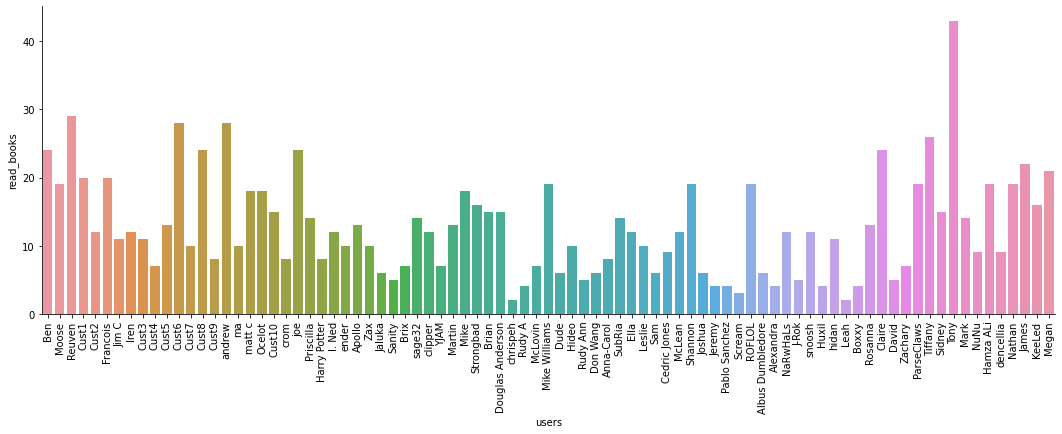

<Figure size 2520x1080 with 0 Axes>

In [42]:
# User who read most books
g=sns.catplot(data=users_ratings_df,x='users',y='read_books',kind='bar',aspect=3)
plt.figure(figsize=(35, 15))
g.set_xticklabels(rotation=90)

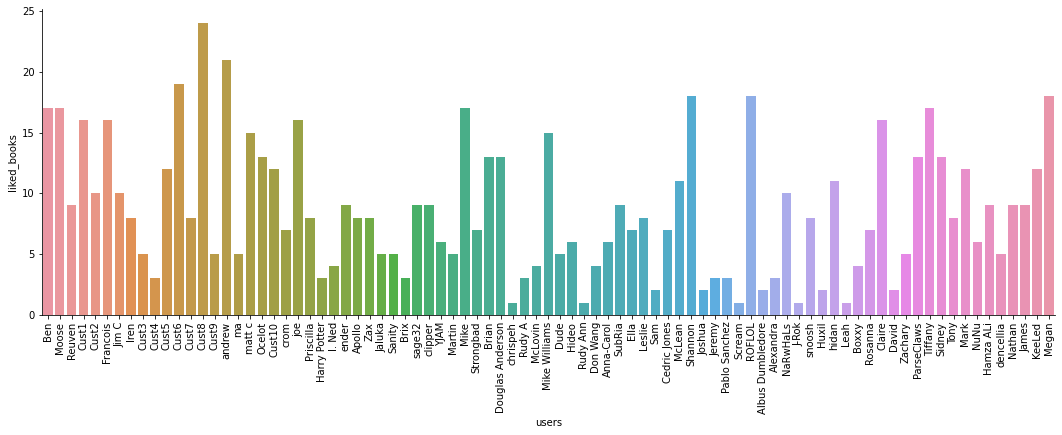

<Figure size 2160x1080 with 0 Axes>

In [43]:
# User who liked most books
g=sns.catplot(data=users_ratings_df,x='users',y='liked_books',kind='bar',aspect=3)
plt.figure(figsize=(30, 15))
g.set_xticklabels(rotation=90)

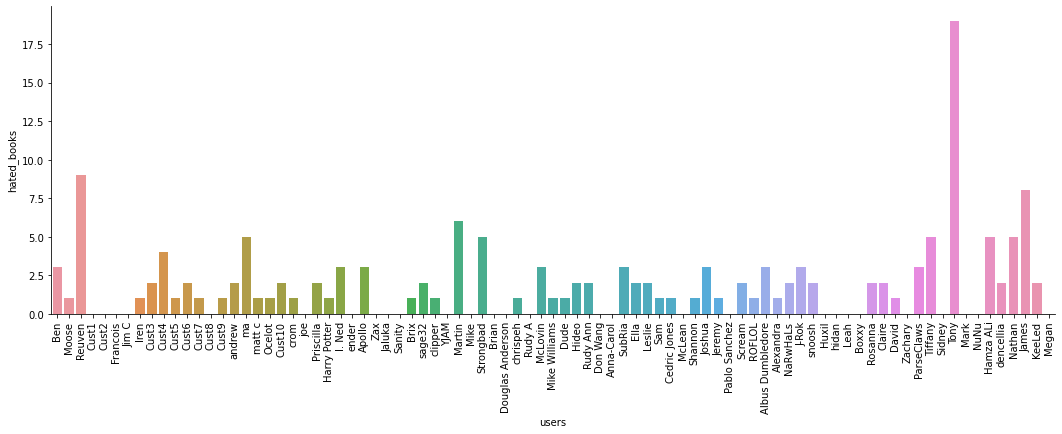

<Figure size 2160x1080 with 0 Axes>

In [44]:
# User who hated most books
g=sns.catplot(data=users_ratings_df,x='users',y='hated_books',kind='bar',aspect=3)
plt.figure(figsize=(30, 15))
g.set_xticklabels(rotation=90)

### Liked Ratio

In [45]:
users_ratings_df['liked_read_ratio']=users_ratings_df['liked_books'].divide(users_ratings_df['read_books'])

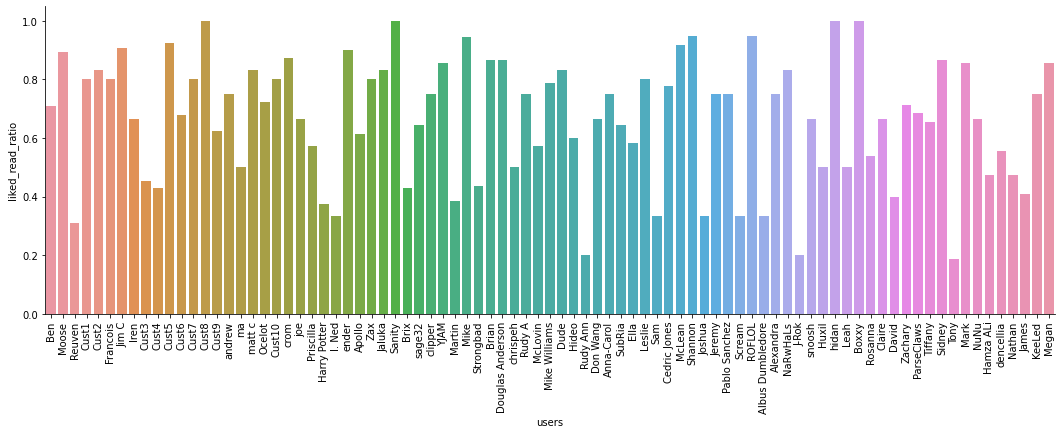

<Figure size 2160x1080 with 0 Axes>

In [46]:
# Liked ratio
g=sns.catplot(data=users_ratings_df,x='users',y='liked_read_ratio',kind='bar',aspect=3)
plt.figure(figsize=(30, 15))
g.set_xticklabels(rotation=90)

In [58]:
users_ratings_df.to_csv("./data/csv/users_ratings_all_columns_df.csv", index=False, encoding='utf-8')

# Changing DataFrame to Long Format

In [59]:
users_ratings_df.head()

,users,ratings,The Hitchhiker's Guide To The Galaxy,Watership Down,The Five People You Meet in Heaven,Speak,I Know Why the Caged Bird Sings,Thirteen Reasons Why,Foundation Series,The Sisterhood of the Travelling Pants,...,Dealing with Dragons,The Chrysalids,new_ratings,rating_distribution,read_books,liked_books,hated_books,neutral_books,unread_books,liked_read_ratio
0,Ben,"[5, 0, 0, 0, 0, 0, 0, 1, 0, 1, -3, 5, 0, 0, 0,...",5,0,0,0,0,0,0,3,...,5,1,"[5, 0, 0, 0, 0, 0, 0, 3, 0, 3, 2, 5, 0, 0, 0, ...","{5: 16, 0: 31, 3: 4, 2: 1, 4: 1, 1: 2}",24,17,3,4,31,0.708333
1,Moose,"[5, 5, 0, 0, 0, 0, 3, 0, 0, 1, 0, 5, 3, 0, 5, ...",5,5,0,0,0,0,4,0,...,0,0,"[5, 5, 0, 0, 0, 0, 4, 0, 0, 3, 0, 5, 4, 0, 5, ...","{5: 11, 0: 36, 4: 6, 3: 1, 2: 1}",19,17,1,1,36,0.894737
2,Reuven,"[5, -5, 0, 0, 0, 0, -3, -5, 0, 1, -5, 5, 0, 1,...",5,1,0,0,0,0,2,1,...,3,4,"[5, 1, 0, 0, 0, 0, 2, 1, 0, 3, 1, 5, 0, 3, 0, ...","{5: 4, 1: 6, 0: 26, 2: 3, 3: 11, 4: 5}",29,9,9,11,26,0.310345
3,Cust1,"[3, 3, 5, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, ...",4,4,5,0,0,0,4,0,...,0,0,"[4, 4, 5, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, ...","{4: 13, 5: 3, 0: 35, 3: 4}",20,16,0,4,35,0.800000
4,Cust2,"[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,0,0,0,0,0,0,0,...,0,4,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","{4: 8, 0: 43, 3: 2, 5: 2}",12,10,0,2,43,0.833333


In [60]:
user_books_col=['users']+all_books_list

In [61]:
temp_df=users_ratings_df.copy()

In [62]:
len(user_books_col)

56

In [63]:
temp_df=temp_df[user_books_col]

In [64]:
temp_df.set_index("users", drop = True, inplace = True)

In [65]:
temp_df.head()

,The Hitchhiker's Guide To The Galaxy,Watership Down,The Five People You Meet in Heaven,Speak,I Know Why the Caged Bird Sings,Thirteen Reasons Why,Foundation Series,The Sisterhood of the Travelling Pants,A Great and Terrible Beauty,The Da Vinci Code,...,The Shadow Club,Bone Series,Maus: A Survivor's Tale,The Joy Luck Club,The Lord of the Rings,The Hobbit,Shattered,The War Of The Worlds,Dealing with Dragons,The Chrysalids
users,,,,,,,,,,,,,,,,,,,,,
Ben,5,0,0,0,0,0,0,3,0,3,...,5,5,0,0,0,5,5,5,5,1
Moose,5,5,0,0,0,0,4,0,0,3,...,0,0,0,0,5,5,0,4,0,0
Reuven,5,1,0,0,0,0,2,1,0,3,...,0,0,0,0,3,4,3,5,3,4
Cust1,4,4,5,0,0,0,4,0,0,4,...,0,5,0,0,4,3,0,0,0,0
Cust2,4,0,0,0,0,0,0,0,0,0,...,0,4,0,4,4,5,0,4,0,4


In [66]:
long_format_df=temp_df.stack().reset_index()

In [67]:
long_format_df.shape

(4675, 3)

In [70]:
long_format_df.head()

,users,level_1,0
0,Ben,The Hitchhiker's Guide To The Galaxy,5
1,Ben,Watership Down,0
2,Ben,The Five People You Meet in Heaven,0
3,Ben,Speak,0
4,Ben,I Know Why the Caged Bird Sings,0


In [71]:
long_format_df.columns = ['users', 'book', 'rating']

In [72]:
user_list=list(long_format_df.users.unique())
user_mapping_dict = { user_list[i]: i+1  for i in range(len(user_list))}

In [73]:
book_list=list(long_format_df.book.unique())
book_mapping_dict = { book_list[i]: i+1  for i in range(len(book_list))}

In [74]:
long_format_df['user_id']=long_format_df.users.map(user_mapping_dict)
long_format_df['book_id']=long_format_df.book.map(book_mapping_dict)

In [75]:
long_format_df.head()

,users,book,rating,user_id,book_id
0,Ben,The Hitchhiker's Guide To The Galaxy,5,1,1
1,Ben,Watership Down,0,1,2
2,Ben,The Five People You Meet in Heaven,0,1,3
3,Ben,Speak,0,1,4
4,Ben,I Know Why the Caged Bird Sings,0,1,5


In [76]:
# data verified
long_format_df.to_csv('./data/csv/long_format_df.csv',index=False,encoding='utf-8')

# Changing layout of the DataFrame

In [77]:
user_books_col=['users']+all_books_list

In [78]:
users_ratings_df[user_books_col].head()

,users,The Hitchhiker's Guide To The Galaxy,Watership Down,The Five People You Meet in Heaven,Speak,I Know Why the Caged Bird Sings,Thirteen Reasons Why,Foundation Series,The Sisterhood of the Travelling Pants,A Great and Terrible Beauty,...,The Shadow Club,Bone Series,Maus: A Survivor's Tale,The Joy Luck Club,The Lord of the Rings,The Hobbit,Shattered,The War Of The Worlds,Dealing with Dragons,The Chrysalids
0,Ben,5,0,0,0,0,0,0,3,0,...,5,5,0,0,0,5,5,5,5,1
1,Moose,5,5,0,0,0,0,4,0,0,...,0,0,0,0,5,5,0,4,0,0
2,Reuven,5,1,0,0,0,0,2,1,0,...,0,0,0,0,3,4,3,5,3,4
3,Cust1,4,4,5,0,0,0,4,0,0,...,0,5,0,0,4,3,0,0,0,0
4,Cust2,4,0,0,0,0,0,0,0,0,...,0,4,0,4,4,5,0,4,0,4


In [79]:
final_user_books_df_T=users_ratings_df[user_books_col].set_index(['users']).T

In [80]:
final_user_books_df_T=final_user_books_df_T.reset_index()

In [81]:
final_user_books_df_T.rename({'index':'Books'},inplace=True,axis=1)

In [82]:
final_user_books_df_T.rename(index={'users': 'Index'},inplace=True)

In [83]:
final_user_books_df_T.head()

users,Books,Ben,Moose,Reuven,Cust1,Cust2,Francois,Jim C,Iren,Cust3,...,Sidney,Tony,Mark,NuNu,Hamza ALi,dencellia,Nathan,James,KeeLed,Megan
0,The Hitchhiker's Guide To The Galaxy,5,5,5,4,4,4,5,0,0,...,0,1,5,0,0,0,0,4,0,5
1,Watership Down,0,5,1,4,0,4,4,0,0,...,0,1,4,0,0,0,0,3,0,5
2,The Five People You Meet in Heaven,0,0,0,5,0,5,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,Speak,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,0,0,5,0
4,I Know Why the Caged Bird Sings,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [84]:
# data verified
final_user_books_df_T.to_csv('./data/csv/final_user_books_df_T.csv',index=False,encoding='utf-8')

In [85]:
from collections import Counter
final_user_books_df_T['new_ratings'] = final_user_books_df_T.apply(lambda x: list(x)[1:],axis=1)
final_user_books_df_T['rating_distribution'] = final_user_books_df_T['new_ratings'].apply(lambda x: Counter(x))
final_user_books_df_T['read_books'] = final_user_books_df_T['rating_distribution'].apply(lambda x: x[5] + x[4]+x[3] + x[2] + x[1])
final_user_books_df_T['liked_books'] = final_user_books_df_T['rating_distribution'].apply(lambda x: x[5] + x[4])
final_user_books_df_T['hated_books'] = final_user_books_df_T['rating_distribution'].apply(lambda x: x[1] + x[2])
final_user_books_df_T['neutral_books'] = final_user_books_df_T['rating_distribution'].apply(lambda x: x[3])
final_user_books_df_T['unread_books'] = final_user_books_df_T['rating_distribution'].apply(lambda x: x[0])


In [86]:
final_user_books_df_T['average_ratings'] = final_user_books_df_T['rating_distribution'].apply(lambda x: round((x[5]*5 + x[4]*4+x[3]*3 + x[2]*2 + x[1]*1)/(x[5] + x[4]+x[3] + x[2] + x[1]),2) if (x[5] + x[4]+x[3] + x[2] + x[1])>0 else 0)

In [87]:
# data verified
final_user_books_df_T.to_csv('./data/csv/final_user_books_df_T.csv',index=False,encoding='utf-8')

In [88]:
final_user_books_df_T.head()

users,Books,Ben,Moose,Reuven,Cust1,Cust2,Francois,Jim C,Iren,Cust3,...,KeeLed,Megan,new_ratings,rating_distribution,read_books,liked_books,hated_books,neutral_books,unread_books,average_ratings
0,The Hitchhiker's Guide To The Galaxy,5,5,5,4,4,4,5,0,0,...,0,5,"[5, 5, 5, 4, 4, 4, 5, 0, 0, 0, 0, 3, 0, 4, 5, ...","{5: 22, 4: 10, 0: 49, 3: 3, 1: 1}",36,32,1,3,49,4.44
1,Watership Down,0,5,1,4,0,4,4,0,0,...,0,5,"[0, 5, 1, 4, 0, 4, 4, 0, 0, 0, 2, 3, 0, 0, 0, ...","{0: 65, 5: 4, 1: 2, 4: 9, 2: 2, 3: 3}",20,13,4,3,65,3.55
2,The Five People You Meet in Heaven,0,0,0,5,0,5,0,0,0,...,0,0,"[0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 4, 0, 0, 0, ...","{0: 73, 5: 4, 4: 4, 3: 1, 2: 2, 1: 1}",12,8,3,1,73,3.67
3,Speak,0,0,0,0,0,0,0,0,2,...,5,0,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 5, 0, ...","{0: 79, 2: 1, 4: 1, 5: 2, 3: 1, 1: 1}",6,3,2,1,79,3.33
4,I Know Why the Caged Bird Sings,0,0,0,0,0,0,0,0,0,...,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...","{0: 79, 2: 2, 4: 1, 5: 1, 3: 1, 1: 1}",6,2,3,1,79,2.83


### Most Read Books


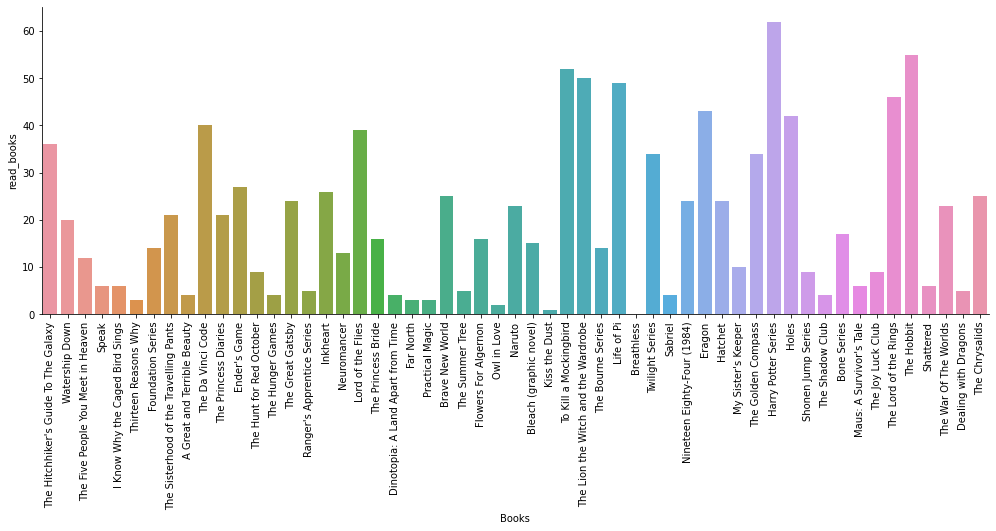

<Figure size 2160x1080 with 0 Axes>

In [89]:
g=sns.catplot(data=final_user_books_df_T,x='Books',y='read_books',kind='bar',aspect=3)
plt.figure(figsize=(30, 15))
g.set_xticklabels(rotation=90)

### Most Liked Books


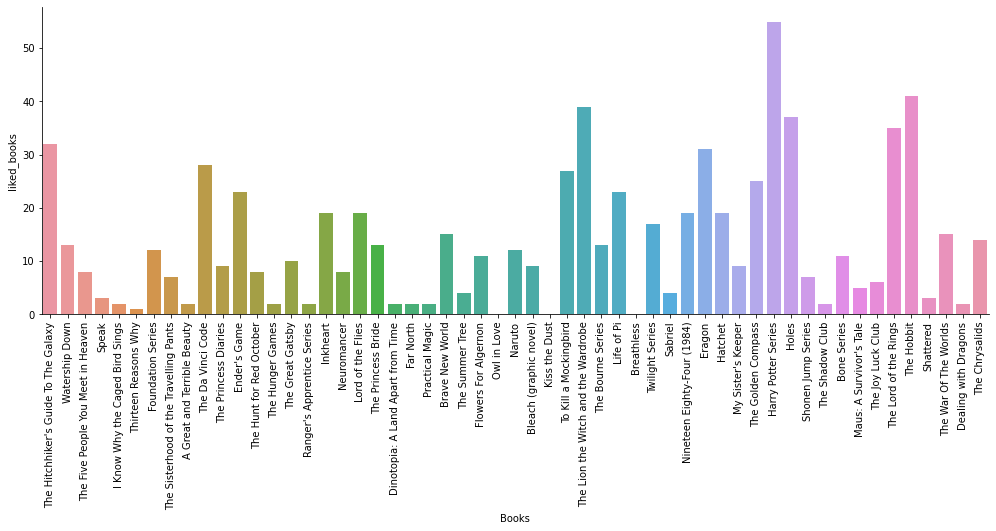

<Figure size 2160x1080 with 0 Axes>

In [90]:
g=sns.catplot(data=final_user_books_df_T,x='Books',y='liked_books',kind='bar',aspect=3)
plt.figure(figsize=(30, 15))
g.set_xticklabels(rotation=90)

### Most Hated Books


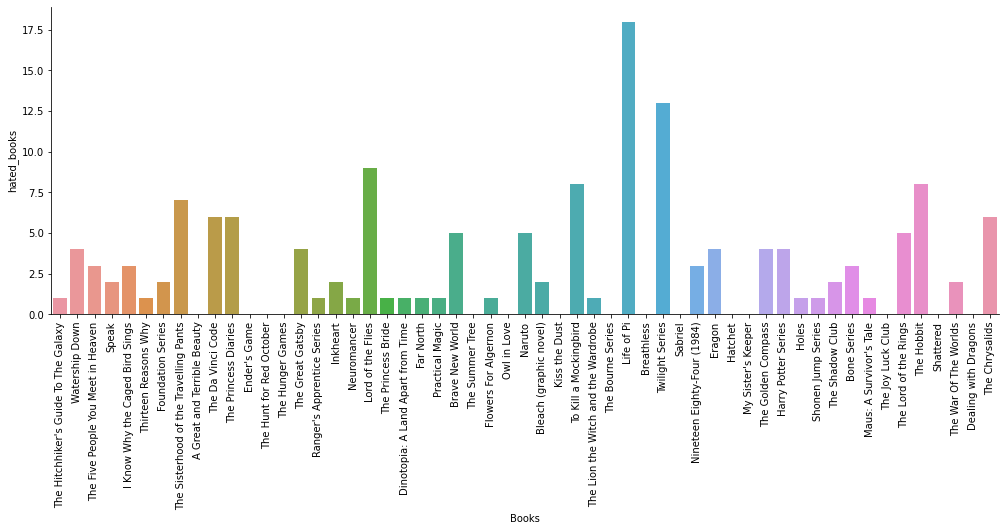

<Figure size 2160x1080 with 0 Axes>

In [91]:
g=sns.catplot(data=final_user_books_df_T,x='Books',y='hated_books',kind='bar',aspect=3)
plt.figure(figsize=(30, 15))
g.set_xticklabels(rotation=90)

### Average Books


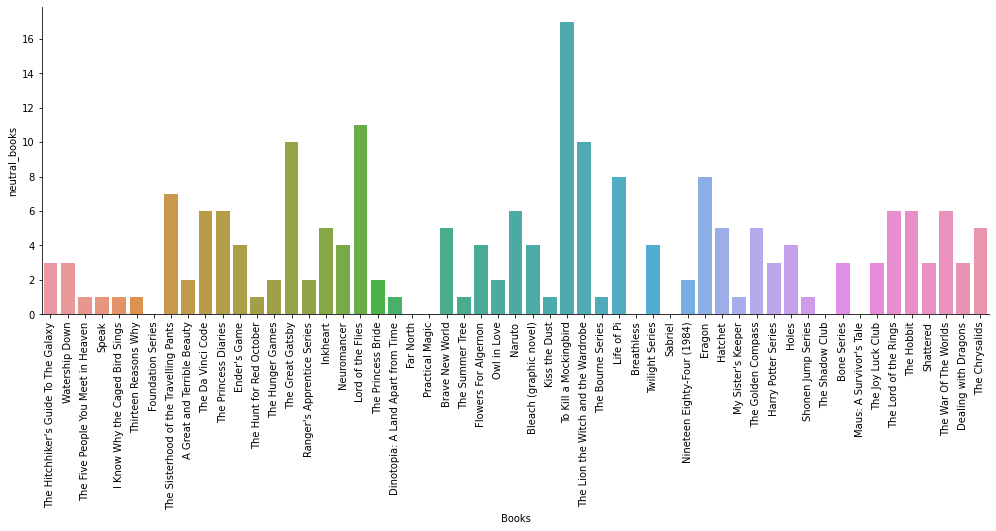

<Figure size 2160x1080 with 0 Axes>

In [92]:
g=sns.catplot(data=final_user_books_df_T,x='Books',y='neutral_books',kind='bar',aspect=3)
plt.figure(figsize=(30, 15))
g.set_xticklabels(rotation=90)

## Finding read to liked ratio

In [93]:
Total_users = 85

In [94]:
final_user_books_df_T['net_liked_book']=(final_user_books_df_T['read_books'].divide(Total_users))*final_user_books_df_T['liked_books']

In [95]:
final_user_books_df_T.head()

users,Books,Ben,Moose,Reuven,Cust1,Cust2,Francois,Jim C,Iren,Cust3,...,Megan,new_ratings,rating_distribution,read_books,liked_books,hated_books,neutral_books,unread_books,average_ratings,net_liked_book
0,The Hitchhiker's Guide To The Galaxy,5,5,5,4,4,4,5,0,0,...,5,"[5, 5, 5, 4, 4, 4, 5, 0, 0, 0, 0, 3, 0, 4, 5, ...","{5: 22, 4: 10, 0: 49, 3: 3, 1: 1}",36,32,1,3,49,4.44,13.552941
1,Watership Down,0,5,1,4,0,4,4,0,0,...,5,"[0, 5, 1, 4, 0, 4, 4, 0, 0, 0, 2, 3, 0, 0, 0, ...","{0: 65, 5: 4, 1: 2, 4: 9, 2: 2, 3: 3}",20,13,4,3,65,3.55,3.058824
2,The Five People You Meet in Heaven,0,0,0,5,0,5,0,0,0,...,0,"[0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 4, 0, 0, 0, ...","{0: 73, 5: 4, 4: 4, 3: 1, 2: 2, 1: 1}",12,8,3,1,73,3.67,1.129412
3,Speak,0,0,0,0,0,0,0,0,2,...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 5, 0, ...","{0: 79, 2: 1, 4: 1, 5: 2, 3: 1, 1: 1}",6,3,2,1,79,3.33,0.211765
4,I Know Why the Caged Bird Sings,0,0,0,0,0,0,0,0,0,...,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...","{0: 79, 2: 2, 4: 1, 5: 1, 3: 1, 1: 1}",6,2,3,1,79,2.83,0.141176


### Best Books

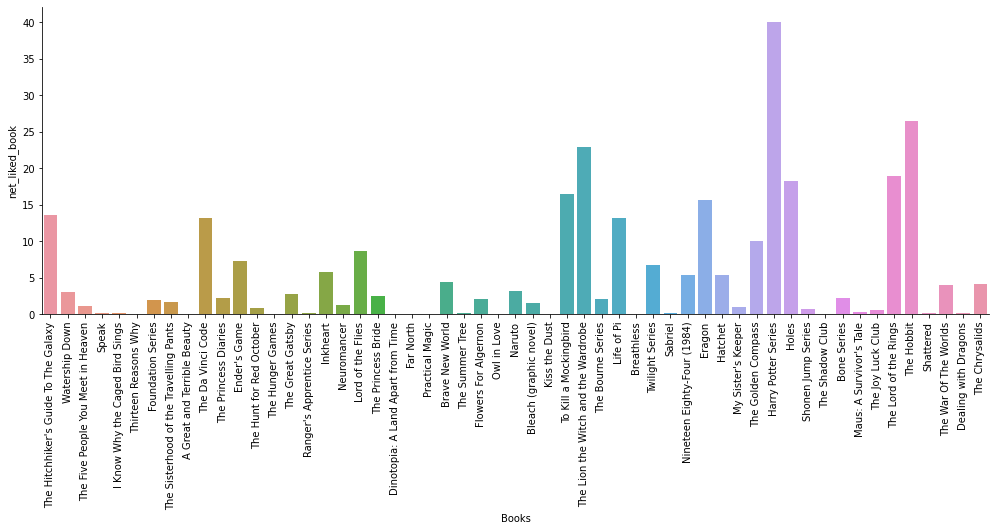

<Figure size 2160x1080 with 0 Axes>

In [96]:
g=sns.catplot(data=final_user_books_df_T,x='Books',y='net_liked_book',kind='bar',aspect=3)
plt.figure(figsize=(30, 15))
g.set_xticklabels(rotation=90)

In [97]:
# Top 10 liked books
final_user_books_df_T.sort_values(by='net_liked_book',
                                 ascending=False)[['Books','net_liked_book']].head(10)

users,Books,net_liked_book
42,Harry Potter Series,40.117647
50,The Hobbit,26.529412
31,The Lion the Witch and the Wardrobe,22.941176
49,The Lord of the Rings,18.941176
43,Holes,18.282353
30,To Kill a Mockingbird,16.517647
38,Eragon,15.682353
0,The Hitchhiker's Guide To The Galaxy,13.552941
33,Life of Pi,13.258824
9,The Da Vinci Code,13.176471


## Finding read to hated ratio

### Worst Books

In [98]:
final_user_books_df_T['net_hated_book']=(final_user_books_df_T['read_books'].divide(Total_users))*final_user_books_df_T['hated_books']

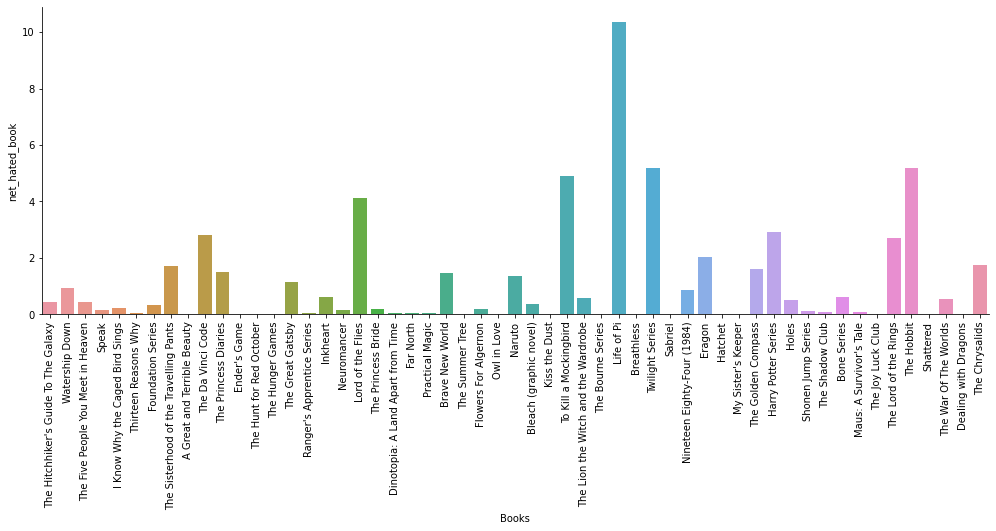

<Figure size 2160x1080 with 0 Axes>

In [99]:
g=sns.catplot(data=final_user_books_df_T,x='Books',y='net_hated_book',kind='bar',aspect=3)
plt.figure(figsize=(30, 15))
g.set_xticklabels(rotation=90)

In [100]:
# Top 10 hated books
final_user_books_df_T.sort_values(by='net_hated_book',
                                 ascending=False)[['Books','net_hated_book']].head(10)

users,Books,net_hated_book
33,Life of Pi,10.376471
35,Twilight Series,5.200000
50,The Hobbit,5.176471
30,To Kill a Mockingbird,4.894118
18,Lord of the Flies,4.129412
42,Harry Potter Series,2.917647
9,The Da Vinci Code,2.823529
49,The Lord of the Rings,2.705882
38,Eragon,2.023529
54,The Chrysalids,1.764706


# Highest and Lowest Rated Books

In [101]:
final_user_books_df_T.head()

users,Books,Ben,Moose,Reuven,Cust1,Cust2,Francois,Jim C,Iren,Cust3,...,new_ratings,rating_distribution,read_books,liked_books,hated_books,neutral_books,unread_books,average_ratings,net_liked_book,net_hated_book
0,The Hitchhiker's Guide To The Galaxy,5,5,5,4,4,4,5,0,0,...,"[5, 5, 5, 4, 4, 4, 5, 0, 0, 0, 0, 3, 0, 4, 5, ...","{5: 22, 4: 10, 0: 49, 3: 3, 1: 1}",36,32,1,3,49,4.44,13.552941,0.423529
1,Watership Down,0,5,1,4,0,4,4,0,0,...,"[0, 5, 1, 4, 0, 4, 4, 0, 0, 0, 2, 3, 0, 0, 0, ...","{0: 65, 5: 4, 1: 2, 4: 9, 2: 2, 3: 3}",20,13,4,3,65,3.55,3.058824,0.941176
2,The Five People You Meet in Heaven,0,0,0,5,0,5,0,0,0,...,"[0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 4, 0, 0, 0, ...","{0: 73, 5: 4, 4: 4, 3: 1, 2: 2, 1: 1}",12,8,3,1,73,3.67,1.129412,0.423529
3,Speak,0,0,0,0,0,0,0,0,2,...,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 5, 0, ...","{0: 79, 2: 1, 4: 1, 5: 2, 3: 1, 1: 1}",6,3,2,1,79,3.33,0.211765,0.141176
4,I Know Why the Caged Bird Sings,0,0,0,0,0,0,0,0,0,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...","{0: 79, 2: 2, 4: 1, 5: 1, 3: 1, 1: 1}",6,2,3,1,79,2.83,0.141176,0.211765


In [126]:
final_user_books_df_T.columns

Index(['Books', 'Ben', 'Moose', 'Reuven', 'Cust1', 'Cust2', 'Francois',
       'Jim C', 'Iren', 'Cust3', 'Cust4', 'Cust5', 'Cust6', 'Cust7', 'Cust8',
       'Cust9', 'andrew', 'ma', 'matt c', 'Ocelot', 'Cust10', 'crom', 'joe',
       'Priscilla', 'Harry Potter', 'I. Ned', 'ender', 'Apollo', 'Zax',
       'Jaluka', 'Sanity', 'Brix', 'sage32', 'clipper', 'YJAM', 'Martin',
       'Mike', 'Strongbad', 'Brian', 'Douglas Anderson', 'chrispeh', 'Rudy A',
       'McLovin', 'Mike Williams', 'Dude', 'Hideo', 'Rudy Ann', 'Don Wang',
       'Anna-Carol', 'SubRia', 'Ella', 'Leslie', 'Sam', 'Cedric Jones',
       'McLean', 'Shannon', 'Joshua', 'Jeremy', 'Pablo Sanchez', 'Scream',
       'ROFLOL', 'Albus Dumbledore', 'Alexandra', 'NaRwHaLs', 'J-Rok',
       'snoosh', 'Huxil', 'hidan', 'Leah', 'Boxxy', 'Rosanna', 'Claire',
       'David', 'Zachary', 'ParseClaws', 'Tiffany', 'Sidney', 'Tony', 'Mark',
       'NuNu', 'Hamza ALi', 'dencellia', 'Nathan', 'James', 'KeeLed', 'Megan',
       'new_ratings', 'r

In [127]:
final_user_books_df_T.sort_values(by='average_ratings',
                                 ascending=False)[['Books','read_books', 'liked_books',
       'hated_books', 'neutral_books', 'unread_books', 'average_ratings',
       'net_liked_book', 'net_hated_book', 'Cluster']].to_csv('./data/csv/book_reviews.csv',index=False,encoding='utf8')

In [125]:
# Top 10 highest rated
final_user_books_df_T.sort_values(by='average_ratings',
                                 ascending=False)[['Books','average_ratings']].head(10)

users,Books,average_ratings
36,Sabriel,4.50
0,The Hitchhiker's Guide To The Galaxy,4.44
32,The Bourne Series,4.43
11,Ender's Game,4.41
40,My Sister's Keeper,4.40
42,Harry Potter Series,4.37
43,Holes,4.31
19,The Princess Bride,4.31
39,Hatchet,4.29
47,Maus: A Survivor's Tale,4.17


In [103]:
# Top 10 lowest rated
final_user_books_df_T.sort_values(by='average_ratings',
                                 ascending=True)[['Books','average_ratings']].head(10)

users,Books,average_ratings
34,Breathless,0.00
5,Thirteen Reasons Why,2.67
4,I Know Why the Caged Bird Sings,2.83
33,Life of Pi,2.98
45,The Shadow Club,3.00
20,Dinotopia: A Land Apart from Time,3.00
29,Kiss the Dust,3.00
26,Owl in Love,3.00
22,Practical Magic,3.00
7,The Sisterhood of the Travelling Pants,3.05


# Implementation

In [104]:
final_user_books_df_T.head()

users,Books,Ben,Moose,Reuven,Cust1,Cust2,Francois,Jim C,Iren,Cust3,...,new_ratings,rating_distribution,read_books,liked_books,hated_books,neutral_books,unread_books,average_ratings,net_liked_book,net_hated_book
0,The Hitchhiker's Guide To The Galaxy,5,5,5,4,4,4,5,0,0,...,"[5, 5, 5, 4, 4, 4, 5, 0, 0, 0, 0, 3, 0, 4, 5, ...","{5: 22, 4: 10, 0: 49, 3: 3, 1: 1}",36,32,1,3,49,4.44,13.552941,0.423529
1,Watership Down,0,5,1,4,0,4,4,0,0,...,"[0, 5, 1, 4, 0, 4, 4, 0, 0, 0, 2, 3, 0, 0, 0, ...","{0: 65, 5: 4, 1: 2, 4: 9, 2: 2, 3: 3}",20,13,4,3,65,3.55,3.058824,0.941176
2,The Five People You Meet in Heaven,0,0,0,5,0,5,0,0,0,...,"[0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 4, 0, 0, 0, ...","{0: 73, 5: 4, 4: 4, 3: 1, 2: 2, 1: 1}",12,8,3,1,73,3.67,1.129412,0.423529
3,Speak,0,0,0,0,0,0,0,0,2,...,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 5, 0, ...","{0: 79, 2: 1, 4: 1, 5: 2, 3: 1, 1: 1}",6,3,2,1,79,3.33,0.211765,0.141176
4,I Know Why the Caged Bird Sings,0,0,0,0,0,0,0,0,0,...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...","{0: 79, 2: 2, 4: 1, 5: 1, 3: 1, 1: 1}",6,2,3,1,79,2.83,0.141176,0.211765


## Feature scaling

In [105]:
X_train=final_user_books_df_T[['read_books','average_ratings']]

In [106]:
X_train.head()

users,read_books,average_ratings
0,36,4.44
1,20,3.55
2,12,3.67
3,6,3.33
4,6,2.83


In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed=scaler.fit_transform(X_train)
X_train_transformed_view=pd.DataFrame(X_train_transformed,
                                 columns=['read_books','average_ratings'])
X_train_transformed_view.head()

,read_books,average_ratings
0,0.998049,1.149365
1,0.011214,-0.148776
2,-0.482203,0.026255
3,-0.852266,-0.469665
4,-0.852266,-1.198957


## KMeans Clustering

## Elbow map

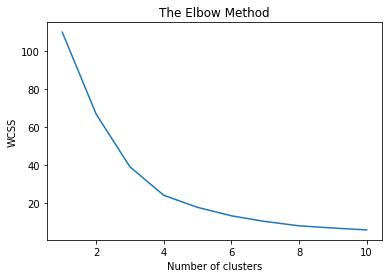

In [108]:
from sklearn.cluster import KMeans

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train_transformed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [109]:
## Chosing - 4 clusters

In [110]:
X_train_transformed_view.head()

,read_books,average_ratings
0,0.998049,1.149365
1,0.011214,-0.148776
2,-0.482203,0.026255
3,-0.852266,-0.469665
4,-0.852266,-1.198957


In [111]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train_transformed)

In [112]:
y_kmeans

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int32)

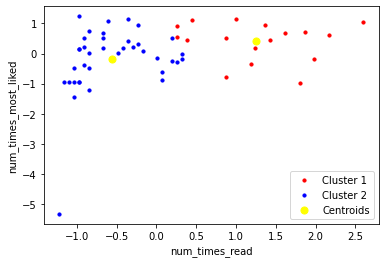

In [113]:


# Visualising the clusters
plt.scatter(X_train_transformed[y_kmeans == 0,0], X_train_transformed[y_kmeans == 0,1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X_train_transformed[y_kmeans == 1,0], X_train_transformed[y_kmeans == 1,1], s = 10, c = 'blue', label = 'Cluster 2')
# plt.scatter(X_train_transformed[y_kmeans == 2,0], X_train_transformed[y_kmeans == 2,1], s = 10, c = 'green', label = 'Cluster 3')
# plt.scatter(X_train_transformed[y_kmeans == 3,0], X_train_transformed[y_kmeans == 3,1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.xlabel('num_times_read')
plt.ylabel('num_times_most_liked')
plt.legend()
plt.show()

## Adding clusters

In [114]:
final_user_books_df_T['Cluster']=y_kmeans

In [115]:
final_user_books_df_T.head()

users,Books,Ben,Moose,Reuven,Cust1,Cust2,Francois,Jim C,Iren,Cust3,...,rating_distribution,read_books,liked_books,hated_books,neutral_books,unread_books,average_ratings,net_liked_book,net_hated_book,Cluster
0,The Hitchhiker's Guide To The Galaxy,5,5,5,4,4,4,5,0,0,...,"{5: 22, 4: 10, 0: 49, 3: 3, 1: 1}",36,32,1,3,49,4.44,13.552941,0.423529,0
1,Watership Down,0,5,1,4,0,4,4,0,0,...,"{0: 65, 5: 4, 1: 2, 4: 9, 2: 2, 3: 3}",20,13,4,3,65,3.55,3.058824,0.941176,1
2,The Five People You Meet in Heaven,0,0,0,5,0,5,0,0,0,...,"{0: 73, 5: 4, 4: 4, 3: 1, 2: 2, 1: 1}",12,8,3,1,73,3.67,1.129412,0.423529,1
3,Speak,0,0,0,0,0,0,0,0,2,...,"{0: 79, 2: 1, 4: 1, 5: 2, 3: 1, 1: 1}",6,3,2,1,79,3.33,0.211765,0.141176,1
4,I Know Why the Caged Bird Sings,0,0,0,0,0,0,0,0,0,...,"{0: 79, 2: 2, 4: 1, 5: 1, 3: 1, 1: 1}",6,2,3,1,79,2.83,0.141176,0.211765,1


In [116]:
final_user_books_df_T['Cluster'].value_counts()

1    38
0    17
Name: Cluster, dtype: int64

In [117]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
final_user_books_df_T.groupby(['Cluster'],as_index=False).agg({'average_ratings':list})

,Cluster,average_ratings
0,0,"[4.44, 3.77, 4.41, 3.96, 3.41, 3.54, 4.14, 2.98, 3.12, 4.04, 3.95, 4.29, 4.0, 4.37, 4.31, 4.13, 4.07]"
1,1,"[3.55, 3.67, 3.33, 2.83, 2.67, 3.93, 3.05, 3.75, 3.24, 4.0, 3.75, 3.46, 3.4, 3.77, 4.31, 3.0, 3.33, 3.0, 3.64, 4.0, 3.88, 3.0, 3.48, 3.8, 3.0, 4.43, 0.0, 4.5, 4.4, 4.11, 3.0, 3.71, 4.17, 3.78, 3.67, 4.0, 3.8, 3.52]"


In [121]:
final_user_books_df_T.to_csv('./data/csv/final_user_books_df_T.csv',index=False,encoding='utf-8')

In [119]:
# Long format Book Rting